In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr
from scipy import stats, integrate
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [2]:
import seaborn as sns
sns.set(color_codes=True,font_scale=2)

In [3]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

**Read Data**

I also define some values as integers, take some logs, and save for future reference.


In [4]:
h = pd.read_csv('D1216mdif2plus.csv',index_col=0)
h['Sector']=h['Sector'].astype(int)
h['EmpLevel']=h['EmpLevel'].astype(int)
h['firmas12']=h['firmas12'].astype(int)
h['firmas16']=h['firmas16'].astype(int)

#h.columns = ['ent','mun','Sector','EmpLevel','firmas12','firmas16','diffirmas']
h.head()

,entmun,Sector,EmpLevel,firmas12,firmas16,firmasdif,ptot10,im10,ptot15,im15,ptot10cum,dptot,nacent10,nacotrent10,pob5ymas10,vivotrent10,viveu10,ptot15cum
0,1001.0,1,1,5,17,12.0,797010.0,-1.768,877190.0,-1.676,90924681.0,0.02012,75.3,23.5,94.1,4.6,0.9,98265215
1,1001.0,1,2,4,0,-4.0,797010.0,-1.768,877190.0,-1.676,90924681.0,0.02012,75.3,23.5,94.1,4.6,0.9,98265215
2,1001.0,1,3,1,0,-1.0,797010.0,-1.768,877190.0,-1.676,90924681.0,0.02012,75.3,23.5,94.1,4.6,0.9,98265215
3,1001.0,1,4,1,0,-1.0,797010.0,-1.768,877190.0,-1.676,90924681.0,0.02012,75.3,23.5,94.1,4.6,0.9,98265215
4,1001.0,1,5,0,0,0.0,797010.0,-1.768,877190.0,-1.676,90924681.0,0.02012,75.3,23.5,94.1,4.6,0.9,98265215


In [5]:
h['Sector']=h['Sector'].astype(int)
h['EmpLevel']=h['EmpLevel'].astype(int)
h['entmun']=h['entmun'].astype(int)
h['ptot15cum']=h['ptot15cum']/1.194916e+08
h['ptot10cum']=h['ptot10cum']/1.123365e+08
h['logfirms12']=h.firmas12.apply(lambda x: np.log(1+x))
h['logfirms16']=h.firmas16.apply(lambda x: np.log(1+x))
h['logptot10']=h.ptot10.apply(lambda x: np.log(x))
h['logptot15']=h.ptot15.apply(lambda x: np.log(x))

h.describe()

,entmun,Sector,EmpLevel,firmas12,firmas16,firmasdif,ptot10,im10,ptot15,im15,...,nacent10,nacotrent10,pob5ymas10,vivotrent10,viveu10,ptot15cum,logfirms12,logfirms16,logptot10,logptot15
count,154665.000000,154665.000000,154665.000000,154665.000000,154665.000000,154665.000000,1.546650e+05,154665.000000,1.546650e+05,154665.000000,...,154665.000000,154665.000000,154665.000000,154665.000000,154665.000000,1.546650e+05,154665.000000,154665.000000,154665.000000,154665.000000
mean,19365.572301,5.000000,4.000000,28.381780,31.772276,3.390496,4.565865e+04,0.000413,4.858149e+04,0.000360,...,90.399308,8.134379,95.724725,2.255275,1.283747,1.193638e-01,0.781453,0.816636,9.416232,9.446603
std,7361.389648,2.581997,2.000006,373.722504,401.295685,47.994908,1.327420e+05,0.999785,1.390434e+05,0.999943,...,9.679783,9.167626,2.570824,2.370886,1.991641,1.622559e-01,1.422310,1.461658,1.553039,1.591947
min,1001.000000,1.000000,1.000000,0.000000,0.000000,-2889.000000,9.300000e+01,-2.342000,8.700000e+01,-2.228000,...,29.200000,-6.000000,60.200000,-6.000000,-6.000000,7.280847e-07,0.000000,0.000000,4.532599,4.465908
25%,14083.000000,3.000000,2.000000,0.000000,0.000000,0.000000,4.263000e+03,-0.760000,4.245000e+03,-0.748000,...,87.900000,2.500000,94.600000,1.000000,0.400000,1.066226e-02,0.000000,0.000000,8.357728,8.353497
50%,20230.000000,5.000000,4.000000,0.000000,0.000000,0.000000,1.271300e+04,-0.029000,1.329000e+04,-0.073000,...,93.400000,5.200000,96.000000,1.800000,1.100000,5.305372e-02,0.000000,0.000000,9.450380,9.494767
75%,24031.000000,7.000000,6.000000,2.000000,2.000000,0.000000,3.267700e+04,0.679000,3.435300e+04,0.643000,...,96.500000,10.400000,97.300000,2.900000,2.300000,1.640772e-01,1.098612,1.098612,10.394427,10.444445
max,32058.000000,9.000000,7.000000,40111.000000,41037.000000,5138.000000,1.815786e+06,4.363000,1.827868e+06,5.027000,...,100.000000,65.200000,100.000000,38.800000,11.400000,1.000000e+00,10.599431,10.622254,14.412029,14.418661


In [6]:
h.head()

,entmun,Sector,EmpLevel,firmas12,firmas16,firmasdif,ptot10,im10,ptot15,im15,...,nacent10,nacotrent10,pob5ymas10,vivotrent10,viveu10,ptot15cum,logfirms12,logfirms16,logptot10,logptot15
0,1001,1,1,5,17,12.0,797010.0,-1.768,877190.0,-1.676,...,75.3,23.5,94.1,4.6,0.9,0.822361,1.791759,2.890372,13.588623,13.684479
1,1001,1,2,4,0,-4.0,797010.0,-1.768,877190.0,-1.676,...,75.3,23.5,94.1,4.6,0.9,0.822361,1.609438,0.000000,13.588623,13.684479
2,1001,1,3,1,0,-1.0,797010.0,-1.768,877190.0,-1.676,...,75.3,23.5,94.1,4.6,0.9,0.822361,0.693147,0.000000,13.588623,13.684479
3,1001,1,4,1,0,-1.0,797010.0,-1.768,877190.0,-1.676,...,75.3,23.5,94.1,4.6,0.9,0.822361,0.693147,0.000000,13.588623,13.684479
4,1001,1,5,0,0,0.0,797010.0,-1.768,877190.0,-1.676,...,75.3,23.5,94.1,4.6,0.9,0.822361,0.000000,0.000000,13.588623,13.684479


In [7]:
h.to_csv('Datos6.csv')

**Begin PCA Dimension Reduction Analysis**

First we study munipalities according to the number of firms across Sectors and Employment Levels 

In [8]:
munfirms=pd.pivot_table(h, values='logfirms12', index='entmun',columns=['Sector','EmpLevel'])
munfirms.head(1)


Sector           1                                                      2  \
EmpLevel         1         2         3         4    5    6    7         1   
entmun                                                                      
1001      1.791759  1.609438  0.693147  0.693147  0.0  0.0  0.0  5.147494   

Sector                          ...            8                 9            \
EmpLevel         2         3    ...            5    6    7       1         2   
entmun                          ...                                            
1001      4.060443  4.691348    ...     2.079442  0.0  0.0  5.7301  4.060443   

Sector                                                     
EmpLevel        3         4         5         6         7  
entmun                                                     
1001      4.51086  3.610918  3.295837  3.178054  3.218876  

[1 rows x 63 columns]

In [9]:
munfirms16=pd.pivot_table(h, values='logfirms16', index='entmun',columns=['Sector','EmpLevel'])
munfirms16.head(1)


Sector           1                                      2                      \
EmpLevel         1    2    3    4    5    6    7        1         2         3   
entmun                                                                          
1001      2.890372  0.0  0.0  0.0  0.0  0.0  0.0  4.94876  4.094345  4.770685   

Sector      ...           8                             9                      \
EmpLevel    ...           5         6         7         1         2         3   
entmun      ...                                                                 
1001        ...     1.94591  2.484907  0.693147  4.553877  4.094345  4.477337   

Sector                                            
EmpLevel         4         5         6         7  
entmun                                            
1001      3.526361  3.178054  3.688879  3.044522  

[1 rows x 63 columns]

Perform PCA analysis for 2012 firms, and apply same transformation to 2016 firms

In [10]:
x_cols=munfirms.as_matrix()
x_cols_scaled = preprocessing.scale(x_cols)

aa=munfirms16
#x_cols16=munfirms16.as_matrix()

for col in aa.columns:
    aa[col]=(munfirms16[col]-munfirms[col].mean())/munfirms[col].std()
#aa.head(1)    Verified en excel
x_cols16_scaled=aa.as_matrix()

In [11]:
pca = PCA(n_components=4)
pca.fit(x_cols_scaled)
PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,svd_solver='auto', tol=0.0, whiten=False)
print(pca.explained_variance_ratio_) 

[ 0.64427546  0.07965586  0.05630324  0.0183572 ]


In [12]:
xpca=pca.transform(x_cols_scaled)
munfirms['x']=xpca[:,0]
munfirms['y']=xpca[:,1]
munfirms['z']=xpca[:,2]
munfirms=munfirms.reset_index()
munfirms=munfirms[['entmun','x','y','z']]
munfirms.columns=[['entmun','x','y','z']]
munfirms.head()

,entmun,x,y,z
0,1001,31.139419,5.817599,0.237864
1,1002,-0.718169,-0.605252,-0.891941
2,1003,3.260364,-2.720385,-1.213549
3,1004,-1.984257,0.240514,-0.407973
4,1005,8.912515,-0.846573,-2.945456


In [13]:
xpca16=pca.transform(x_cols16_scaled)
munfirms16['x16']=xpca16[:,0]
munfirms16['y16']=xpca16[:,1]
munfirms16['z16']=xpca16[:,2]
munfirms16=munfirms16.reset_index()
munfirms16=munfirms16[['entmun','x16','y16','z16']]
munfirms16.columns=[['entmun','x16','y16','z16']]
munfirms16.head()


,entmun,x16,y16,z16
0,1001,33.912226,11.341324,-0.172887
1,1002,-0.224036,-0.434790,-0.833315
2,1003,4.261693,-2.066642,-0.052882
3,1004,-1.650160,-0.088927,-0.484628
4,1005,11.153631,0.248004,-2.875822


In [14]:
munfirmsboth=pd.merge(munfirms,munfirms16)
munfirmsboth['dx']=(munfirmsboth.x16-munfirmsboth.x)/4
munfirmsboth['dy']=(munfirmsboth.y16-munfirmsboth.y)/4
munfirmsboth['dz']=(munfirmsboth.z16-munfirmsboth.z)/4
munfirmsboth.to_csv('munfirmsboth.csv')
munfirmsboth.describe()

,entmun,x,y,z,x16,y16,z16,dx,dy,dz
count,2455.000000,2.455000e+03,2.455000e+03,2.455000e+03,2455.000000,2455.000000,2455.000000,2455.000000,2455.000000,2455.000000
mean,19365.572301,1.723175e-15,-2.653682e-16,-4.457893e-16,0.420512,0.301669,-0.189102,0.105128,0.075417,-0.047275
std,7362.851174,6.372275e+00,2.240617e+00,1.883759e+00,6.932021,2.352235,1.591583,0.209669,0.282495,0.255983
min,1001.000000,-5.350491e+00,-9.577997e+00,-4.448072e+00,-5.266869,-7.203712,-3.976580,-0.578151,-0.521215,-2.975744
25%,14083.500000,-3.546063e+00,-1.397957e+00,-8.951028e-01,-3.463133,-1.069883,-0.958802,-0.016097,-0.065833,-0.072612
50%,20230.000000,-2.105013e+00,1.751311e-01,-1.450857e-02,-1.934909,0.243605,-0.184772,0.048254,-0.004824,-0.020924
75%,24030.500000,6.247648e-01,1.477010e+00,6.095217e-01,1.182278,1.407316,0.409814,0.159489,0.105985,0.021645
max,32058.000000,4.222025e+01,1.798219e+01,1.956699e+01,44.531272,21.858930,18.193691,2.052741,2.315277,1.274298


C:\Users\DavidMayerF\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


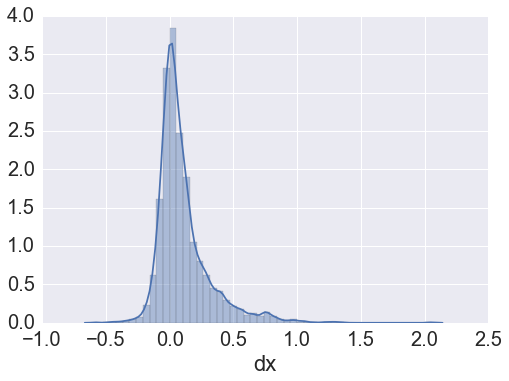

In [15]:
sns.distplot(munfirmsboth.dx)

**Now we graph some results from the PCA analysis**

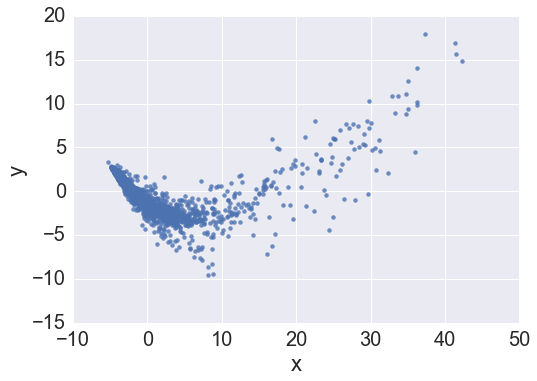

In [16]:
sns.regplot('x', 'y', data=munfirmsboth, fit_reg=False)

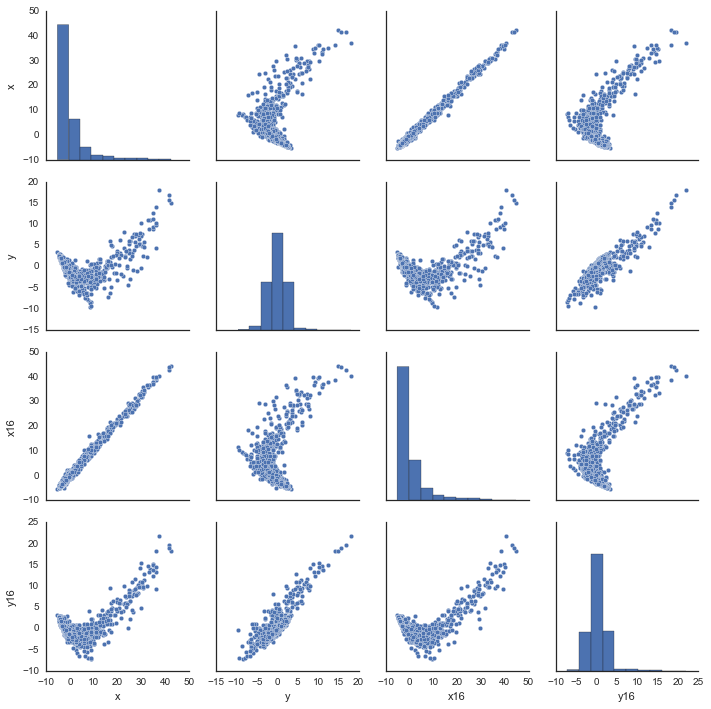

In [17]:
sns.set(style="white")
sns.pairplot(munfirmsboth,vars=['x','y', 'x16', 'y16'])

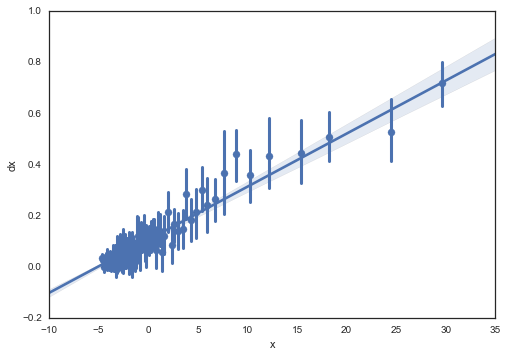

In [18]:
sns.regplot('x', 'dx', data=munfirmsboth,x_bins=98)

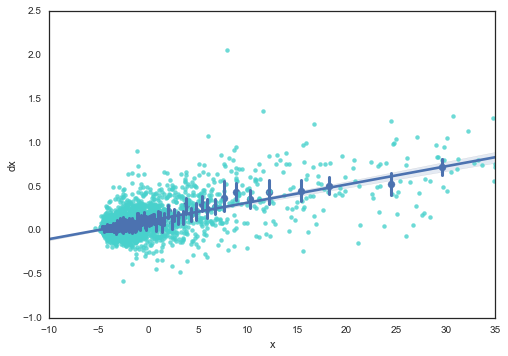

In [19]:
fig=sns.regplot(x=munfirmsboth.x, y=munfirmsboth.dx,x_bins=98,x_ci=95)
#fig=sns.regplot(x=munfirmsboth.x, y=munfirmsboth.dx,lowess=True,x_ci=95,color='magenta',scatter=False)
fig=sns.regplot(x=munfirmsboth.x, y=munfirmsboth.dx,fit_reg=False,color='mediumturquoise')
#fig=sns.distplot(p.popgrowth10_15)
#plt.xlim(0,1)
#plt.ylim(-0.05,0.07)
#fig.set_xlabel('First Principal Component of Log(1 +Firm Numbers), 2012')
#fig.set_ylabel('Change in Said Component 2012-2016')
plt.show()

In [20]:
munfirmsE=pd.pivot_table(h, values='logfirms12', index='entmun',columns='EmpLevel', aggfunc='sum')
munfirmsE.columns=[1,2,3,4,5,6,7]
munfirmsE=munfirmsE.apply(lambda x: (x - np.mean(x)) / np.std(x) )
munfirmsE['MaxEmpLevel']=munfirmsE.idxmax(axis=1)
munfirmsE=munfirmsE.reset_index()
munfirmsE=munfirmsE[['entmun','MaxEmpLevel']]
munfirms.head()
munall=pd.merge(munfirms,munfirmsE)
munall.head()

,entmun,x,y,z,MaxEmpLevel
0,1001,31.139419,5.817599,0.237864,7
1,1002,-0.718169,-0.605252,-0.891941,1
2,1003,3.260364,-2.720385,-1.213549,2
3,1004,-1.984257,0.240514,-0.407973,7
4,1005,8.912515,-0.846573,-2.945456,2


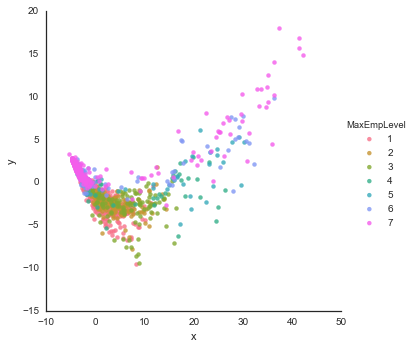

In [21]:
sns.lmplot('x', 'y', data=munall, hue='MaxEmpLevel' , fit_reg=False)

In [22]:
munfirmsS=pd.pivot_table(h, values='logfirms12', index='entmun',columns='Sector', aggfunc='sum')
munfirmsS.columns=[1,2,3,4,5,6,7,8,9]
munfirmsS=munfirmsS.apply(lambda x: (x - np.mean(x)) / np.std(x) )
munfirmsS['MaxSector']=munfirmsS.idxmax(axis=1)
munfirmsS=munfirmsS.reset_index()
munfirmsS=munfirmsS[['entmun','MaxSector']]
munall=pd.merge(munall,munfirmsS)
munall=pd.merge(munall,munfirmsboth[['entmun','x','y', 'x16', 'y16','dx','dy']])
munall.head()


,entmun,x,y,z,MaxEmpLevel,MaxSector,x16,y16,dx,dy
0,1001,31.139419,5.817599,0.237864,7,2,33.912226,11.341324,0.693202,1.380931
1,1002,-0.718169,-0.605252,-0.891941,1,4,-0.224036,-0.434790,0.123533,0.042615
2,1003,3.260364,-2.720385,-1.213549,2,2,4.261693,-2.066642,0.250332,0.163436
3,1004,-1.984257,0.240514,-0.407973,7,9,-1.650160,-0.088927,0.083524,-0.082360
4,1005,8.912515,-0.846573,-2.945456,2,3,11.153631,0.248004,0.560279,0.273644


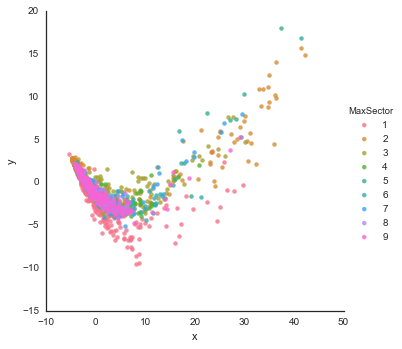

In [23]:
sns.lmplot('x', 'y', data=munall, hue='MaxSector' , fit_reg=False)

**Histograms of Principal Components**

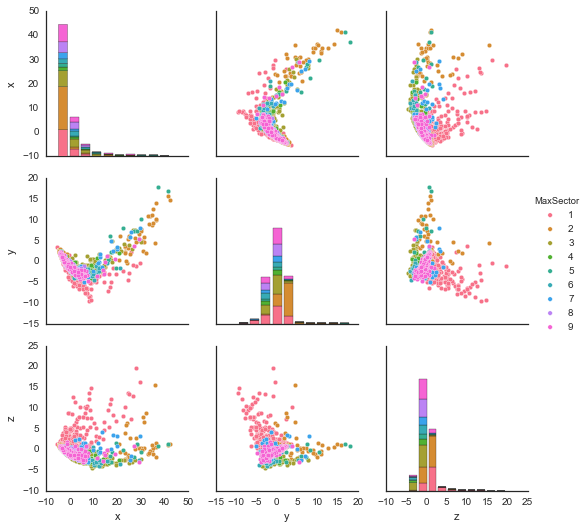

In [24]:
sns.set(style="white")
sns.pairplot(munall,vars=['x','y','z'],hue='MaxSector')

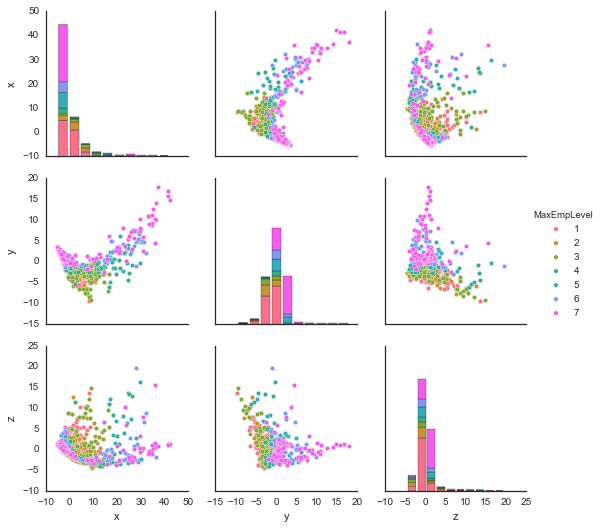

In [25]:
sns.set(style="white")
sns.pairplot(munall,vars=['x','y','z'],hue='MaxEmpLevel')

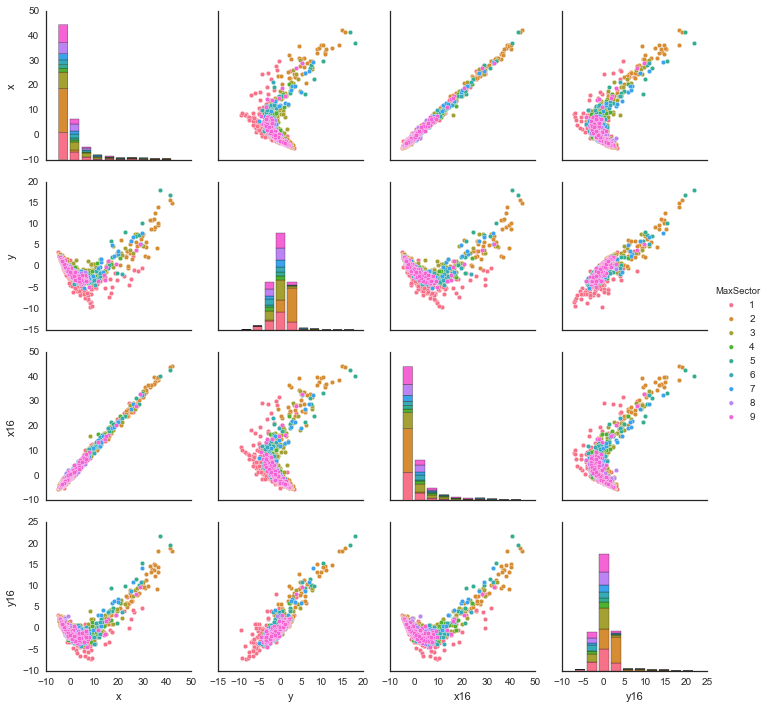

In [26]:
sns.set(style="white")
sns.pairplot(munall,vars=['x','y','x16','y16'],hue='MaxSector')

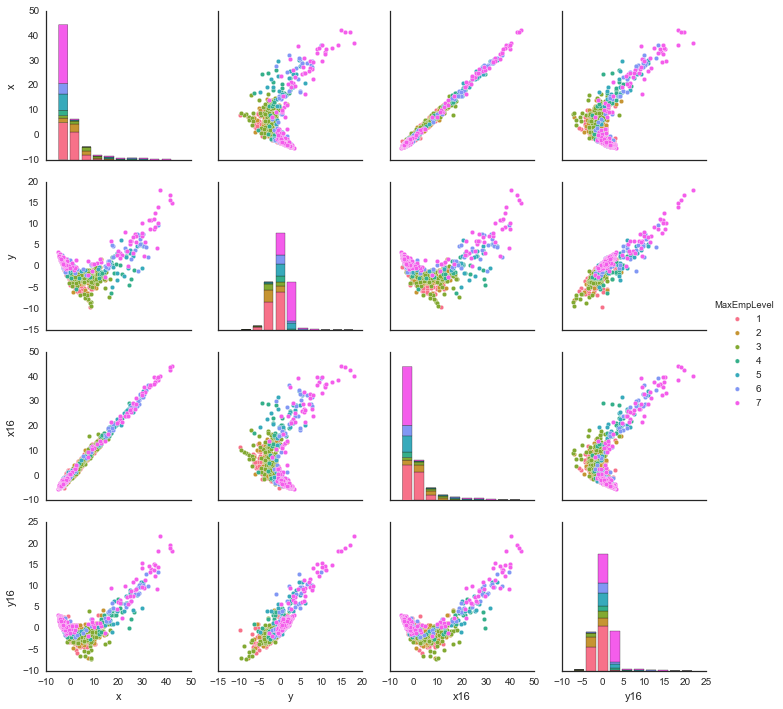

In [27]:
sns.set(style="white")
sns.pairplot(munall,vars=['x','y','x16','y16'],hue='MaxEmpLevel')

**We now look at the population**



In [28]:
p= pd.read_csv('pobmuncum1015.csv',index_col=0)
p['lptot10']=p.ptot10.apply(lambda x: np.log(x))
p['lptot15']=p.ptot15.apply(lambda x: np.log(x))
p['popgrowth10_15']=(p.lptot15-p.lptot10)/5
p['entmun']=1000*p['ent']+p['mun']
p.head()

,ent,mun,ptot10,im10,ptot15,im15,ptot10cum,ptot10cumD,dptot,ptot15cum,ptot15cumD,lptot10,lptot15,popgrowth10_15,entmun
0,1,1,797010,-1.768,877190,-1.676,90924681,22208867,0.020120,98265215,22103617,13.588623,13.684479,0.019171,1001
1,1,2,45492,-0.463,46464,-0.565,25574100,86807930,0.004273,25898514,93639592,10.725292,10.746433,0.004228,1002
2,1,3,54136,-0.754,56048,-0.698,28511764,83878910,0.007064,29150815,90396875,10.899255,10.933964,0.006942,1003
3,1,4,15042,-0.648,15577,-0.674,7767897,104583683,0.007113,7896876,111610343,9.618602,9.653551,0.006990,1004
4,1,5,99590,-1.262,120405,-1.256,41184951,71251177,0.041801,45596596,74015451,11.508817,11.698616,0.037960,1005


In [29]:
p=p[['entmun','im10', 'lptot10']]
p.head()

,entmun,im10,lptot10
0,1001,-1.768,13.588623
1,1002,-0.463,10.725292
2,1003,-0.754,10.899255
3,1004,-0.648,9.618602
4,1005,-1.262,11.508817


**And how it interacts with the firm number principal components we found**

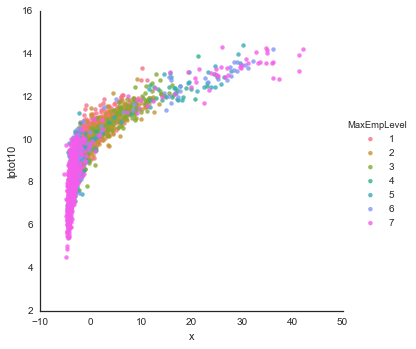

In [30]:
munall=pd.merge(munall,p)

sns.lmplot('x', 'lptot10', data=munall,hue='MaxEmpLevel', fit_reg=False)

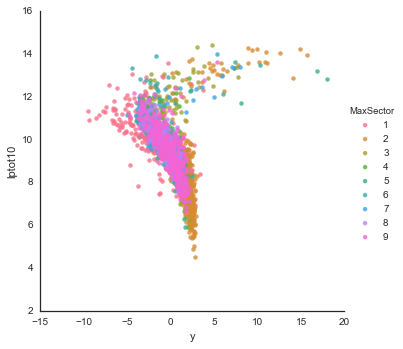

In [31]:
sns.lmplot('y', 'lptot10', data=munall, hue='MaxSector', fit_reg=False)

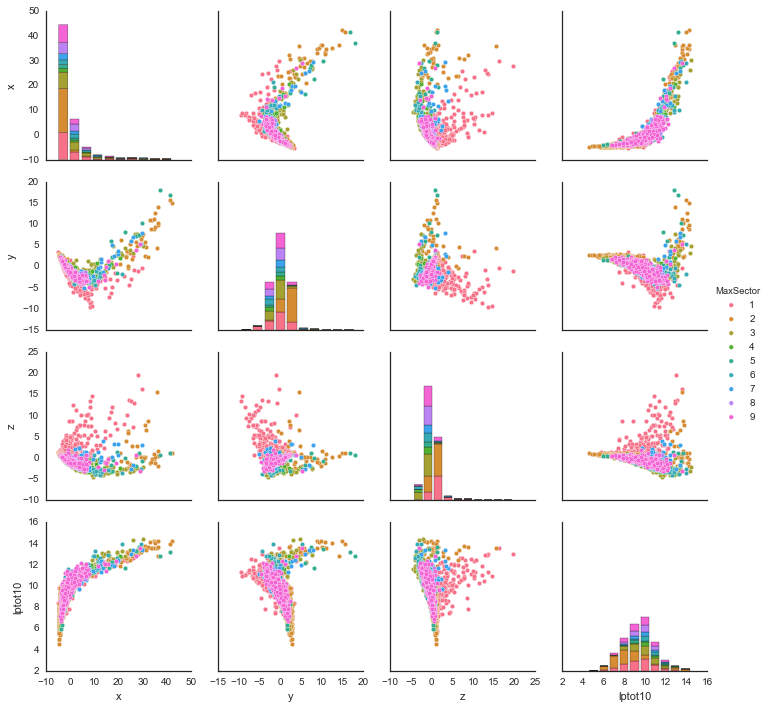

In [32]:
sns.set(style="white")
sns.pairplot(munall,vars=['x','y','z','lptot10'],hue='MaxSector')

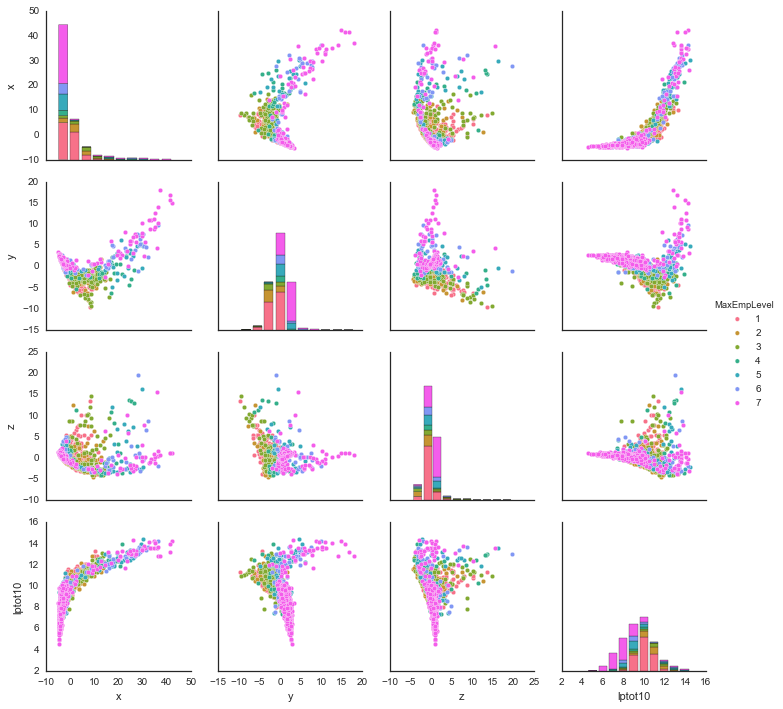

In [33]:
sns.set(style="white")
sns.pairplot(munall,vars=['x','y','z','lptot10'],hue='MaxEmpLevel')


**We will use portions of the distribution of the firm data principal components as features
of the problem. We create these variables here.**

In [34]:
def orderprop(xcenter,nvals,nstep,nmax) :
    v=[]
    for ii in range(-nvals, nvals+1) :
        v.append(xcenter+ii*nstep)
    v=np.searchsorted(a,v, side='left')/nmax
    return v


In [35]:
munxyz=munall[['x','y','z']]
munxyz=(munxyz-munxyz.min())/(munxyz.max()-munxyz.min())

In [36]:
a=munxyz.x
a=np.sort(a)
bb=munxyz.x.apply(lambda x: orderprop(x,3,0.05,2456))
cc=pd.DataFrame(bb)
cc.columns=['A']
ccx=cc.A.apply(pd.Series)
ccx.columns=['xm3','xm2','xm1','x0','x1','x2','x3']
a=munxyz.y
a=np.sort(a)
bb=munxyz.y.apply(lambda x: orderprop(x,3,0.05,2456))
cc=pd.DataFrame(bb)
cc.columns=['A']
ccy=cc.A.apply(pd.Series)
ccy.columns=['ym3','ym2','ym1','y0','y1','y2','y3']
a=munxyz.z
a=np.sort(a)
bb=munxyz.z.apply(lambda x: orderprop(x,3,0.05,2456))
cc=pd.DataFrame(bb)
cc.columns=['A']
ccz=cc.A.apply(pd.Series)
ccz.columns=['zm3','zm2','zm1','z0','z1','z2','z3']
munxyzplus=pd.concat([munall.entmun,munxyz,ccx,ccy,ccz], axis=1)
munxyzplus.head()


,entmun,x,y,z,xm3,xm2,xm1,x0,x1,x2,...,y1,y2,y3,zm3,zm2,zm1,z0,z1,z2,z3
0,1001,0.767066,0.558617,0.195125,0.978827,0.983713,0.987785,0.992264,0.994300,0.996336,...,0.990228,0.993485,0.995114,0.007736,0.069625,0.236156,0.597313,0.925081,0.956840,0.970277
1,1002,0.097378,0.325569,0.148079,0.000000,0.000000,0.340798,0.657573,0.798046,0.864821,...,0.610342,0.899023,0.979235,0.000000,0.009365,0.075733,0.252850,0.622150,0.929153,0.958062
2,1003,0.181012,0.248823,0.134687,0.176303,0.579397,0.765879,0.842834,0.892915,0.922231,...,0.258550,0.474349,0.733306,0.000000,0.004886,0.053339,0.191775,0.500407,0.910423,0.952769
3,1004,0.070763,0.356257,0.168232,0.000000,0.000000,0.052117,0.515472,0.732492,0.831840,...,0.780945,0.976792,0.982085,0.001629,0.027687,0.118485,0.378257,0.837541,0.944218,0.964169
4,1005,0.299827,0.316813,0.062570,0.801710,0.866042,0.906352,0.930375,0.945033,0.953583,...,0.567182,0.846498,0.978827,0.000000,0.000000,0.000407,0.020358,0.106678,0.342020,0.769137


In [37]:
munxyzplus.to_csv('munxyzplus.csv')

**Next we apply the same concept to population and migration data.**

In [38]:
mig= pd.read_csv('mig.csv',index_col=0)
mig.head()

,entmun,nacent10,nacotrent10,pob5ymas10,vivotrent10,viveu10
0,1001,75.3,23.5,94.1,4.6,0.9
1,1002,87.5,11.4,95.9,1.7,2.0
2,1003,85.6,11.8,92.8,1.7,5.2
3,1004,89.9,9.2,95.1,2.1,2.4
4,1005,82.2,16.4,93.8,4.0,1.5


In [39]:
munpop=pd.merge(p,mig)
munpop=munpop[['entmun', 'im10', 'lptot10', 'nacent10', 'viveu10']]
munpop.head()

,entmun,im10,lptot10,nacent10,viveu10
0,1001,-1.768,13.588623,75.3,0.9
1,1002,-0.463,10.725292,87.5,2.0
2,1003,-0.754,10.899255,85.6,5.2
3,1004,-0.648,9.618602,89.9,2.4
4,1005,-1.262,11.508817,82.2,1.5


In [40]:
pop_cols=munpop[['im10', 'lptot10', 'nacent10', 'viveu10']].as_matrix()
pop_cols
pcapop = PCA(n_components=2)
pcapop.fit(pop_cols)
PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,svd_solver='auto', tol=0.0, whiten=False)
print(pcapop.explained_variance_ratio_) 

[ 0.93415069  0.03877729]


In [41]:
poppca=pcapop.transform(pop_cols)
munpop['xpop']=poppca[:,0]
munpop['ypop']=poppca[:,1]
#munpop=munpop.reset_index()
munpop=munpop[['entmun', 'im10', 'lptot10', 'nacent10', 'viveu10', 'xpop', 'ypop']]
munpop.head()

,entmun,im10,lptot10,nacent10,viveu10,xpop,ypop
0,1001,-1.768,13.588623,75.3,0.9,15.382277,-0.578804
1,1002,-0.463,10.725292,87.5,2.0,3.001544,0.700208
2,1003,-0.754,10.899255,85.6,5.2,4.996970,3.859218
3,1004,-0.648,9.618602,89.9,2.4,0.560053,1.150389
4,1005,-1.262,11.508817,82.2,1.5,8.363043,0.125613


**The following graph shows that *ypop* contains data on a disimilar set of municipalities**

Thus, even if *xpop* contains 93% of the variance, it may be worth having *ypop*

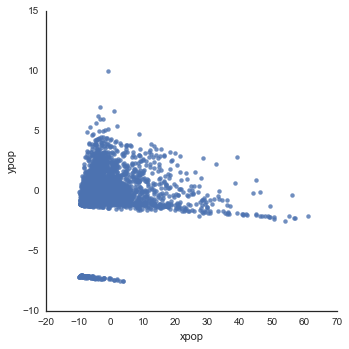

In [42]:
sns.lmplot('xpop', 'ypop', data=munpop, fit_reg=False)

We now create similar variables for population

In [43]:
p= pd.read_csv('pobmuncum1015.csv',index_col=0)
p['lptot10']=p.ptot10.apply(lambda x: np.log(x))
p['lptot15']=p.ptot15.apply(lambda x: np.log(x))
p['popgrowth10_15']=(p.lptot15-p.lptot10)/5
p['entmun']=1000*p['ent']+p['mun']
aa=pd.merge(munpop[['entmun','xpop','ypop']],p[['entmun','ptot10cum']],on='entmun')
munpopxy=aa[['xpop','ypop','ptot10cum']]
munpopxy=(munpopxy-munpopxy.min())/(munpopxy.max()-munpopxy.min())
munpopxy.head(2)

,xpop,ypop,ptot10cum
0,0.356152,0.395596,0.809395
1,0.182149,0.468561,0.227655


In [44]:
a=munpopxy.xpop
a=np.sort(a)
bb=munpopxy.xpop.apply(lambda x: orderprop(x,3,0.05,2456))
cc=pd.DataFrame(bb)
cc.columns=['A']
ccx=cc.A.apply(pd.Series)
ccx.columns=['xpopm3','xpopm2','xpopm1','xpop0','xpop1','xpop2','xpop3']
a=munpopxy.ypop
a=np.sort(a)
bb=munpopxy.ypop.apply(lambda x: orderprop(x,3,0.05,2456))
cc=pd.DataFrame(bb)
cc.columns=['A']
ccy=cc.A.apply(pd.Series)
ccy.columns=['ypopm3','ypopm2','ypopm1','ypop0','ypop1','ypop2','ypop3']
a=munpopxy.ptot10cum
a=np.sort(a)
bb=munpopxy.ptot10cum.apply(lambda x: orderprop(x,3,0.05,2456))
cc=pd.DataFrame(bb)
cc.columns=['A']
ccz=cc.A.apply(pd.Series)
ccz.columns=['cumpm3','cumpm2','cumpm1','cump0','cump1','cump2','cump3']
munpopxyplus=pd.concat([munpop.entmun,munpopxy,ccx,ccy,ccz], axis=1)
munpopxyplus.head()


,entmun,xpop,ypop,ptot10cum,xpopm3,xpopm2,xpopm1,xpop0,xpop1,xpop2,...,ypop1,ypop2,ypop3,cumpm3,cumpm2,cumpm1,cump0,cump1,cump2,cump3
0,1001,0.356152,0.395596,0.809395,0.801303,0.856678,0.901059,0.927932,0.949104,0.960912,...,0.609528,0.779316,0.879886,0.981678,0.985749,0.989414,0.992264,0.995114,0.997150,0.998779
1,1002,0.182149,0.468561,0.227655,0.138436,0.421824,0.635993,0.763029,0.833062,0.885179,...,0.827769,0.914902,0.967020,0.570847,0.685261,0.763844,0.821661,0.864821,0.896987,0.921824
2,1003,0.210194,0.648774,0.253806,0.287052,0.558225,0.712948,0.809446,0.861156,0.904316,...,0.993893,0.997150,0.998779,0.636401,0.730049,0.796417,0.845684,0.882736,0.910831,0.932003
3,1004,0.147836,0.494242,0.069148,0.000000,0.223941,0.496336,0.687296,0.787052,0.847313,...,0.877850,0.945033,0.977606,0.000000,0.000000,0.317997,0.546010,0.668974,0.752443,0.813111
4,1005,0.257501,0.435782,0.366621,0.545195,0.706433,0.804153,0.857085,0.902280,0.928746,...,0.752036,0.864414,0.931189,0.810261,0.856270,0.890472,0.916531,0.936482,0.951547,0.962948


In [45]:
munpopxyplus.to_csv('munpopxyplus.csv')

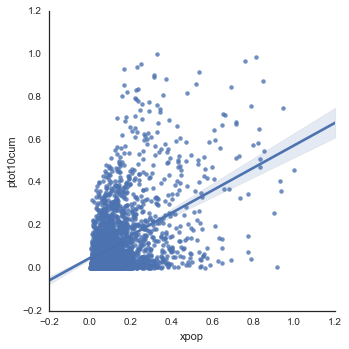

In [46]:
sns.lmplot('xpop','ptot10cum', data=munpopxyplus, fit_reg=True)

In [47]:
munall.head()

,entmun,x,y,z,MaxEmpLevel,MaxSector,x16,y16,dx,dy,im10,lptot10
0,1001,31.139419,5.817599,0.237864,7,2,33.912226,11.341324,0.693202,1.380931,-1.768,13.588623
1,1002,-0.718169,-0.605252,-0.891941,1,4,-0.224036,-0.434790,0.123533,0.042615,-0.463,10.725292
2,1003,3.260364,-2.720385,-1.213549,2,2,4.261693,-2.066642,0.250332,0.163436,-0.754,10.899255
3,1004,-1.984257,0.240514,-0.407973,7,9,-1.650160,-0.088927,0.083524,-0.082360,-0.648,9.618602
4,1005,8.912515,-0.846573,-2.945456,2,3,11.153631,0.248004,0.560279,0.273644,-1.262,11.508817


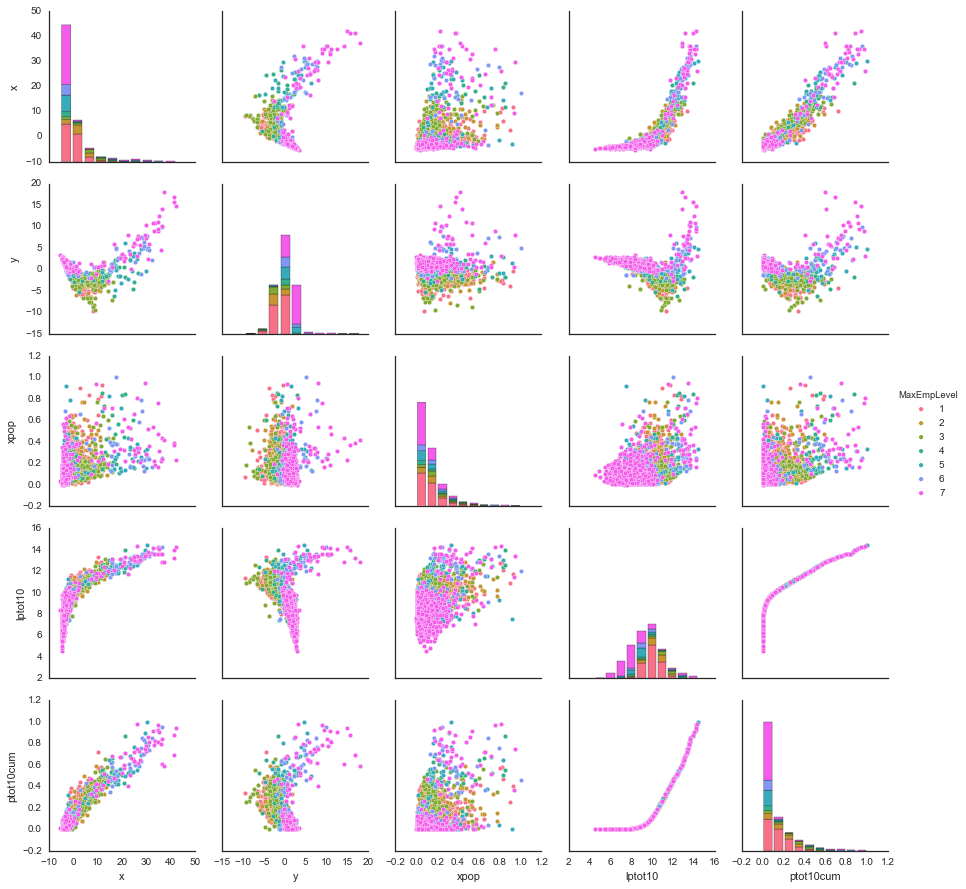

In [48]:
aa=pd.merge(munall,munpopxyplus)
aa.head()
sns.set(style="white")

#g = sns.PairGrid(aa[['x','y','xpop','lptot10','ptot10cum']], diag_sharey=False)
#g.map_lower(sns.kdeplot, cmap="Blues_d")
#g.map_upper(plt.scatter)
#g.map_diag(sns.kdeplot, lw=3)
sns.pairplot(aa,vars=['x','y','xpop','lptot10','ptot10cum'],hue='MaxEmpLevel')

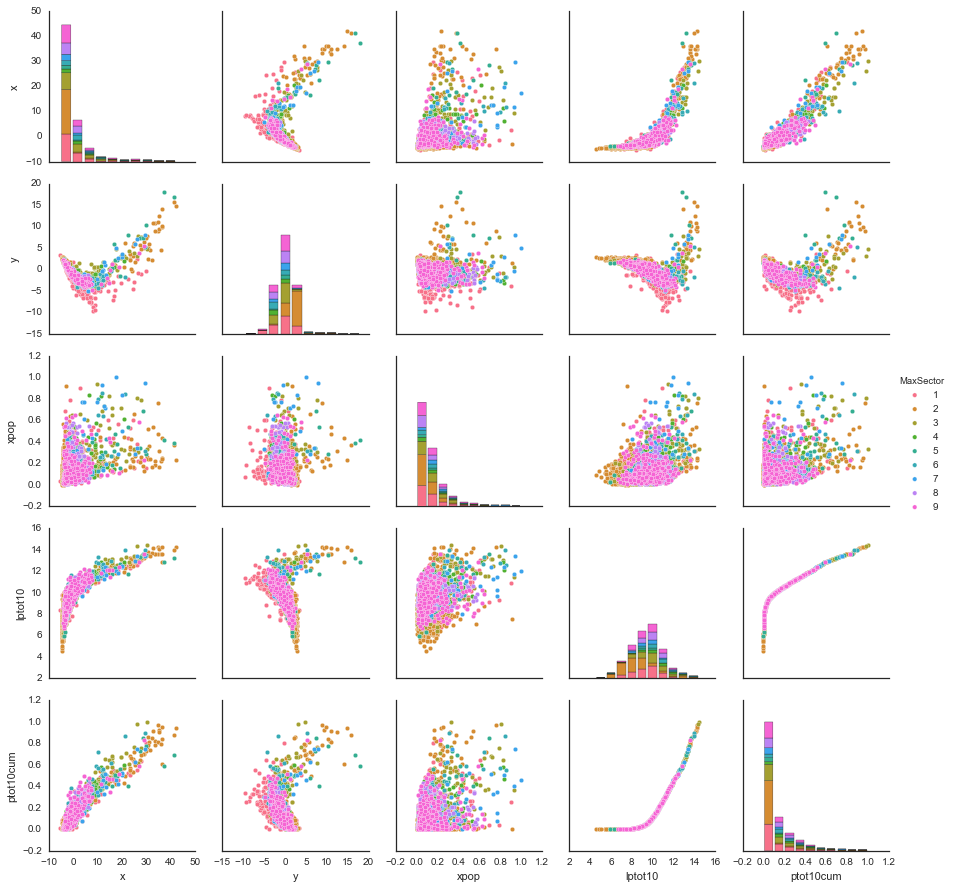

In [49]:
aa=pd.merge(munall,munpopxyplus)
aa.head()
sns.set(style="white")

#g = sns.PairGrid(aa[['x','y','xpop','lptot10','ptot10cum']], diag_sharey=False)
#g.map_lower(sns.kdeplot, cmap="Blues_d")
#g.map_upper(plt.scatter)
#g.map_diag(sns.kdeplot, lw=3)
sns.pairplot(aa,vars=['x','y','xpop','lptot10','ptot10cum'],hue='MaxSector')

**Relationship between *xpop* and *x* and between *xpop* and *lptot10* **

In [50]:
munpopfirms=pd.merge(munall,munpop,on='entmun')
munpopfirms.head()

,entmun,x,y,z,MaxEmpLevel,MaxSector,x16,y16,dx,dy,im10_x,lptot10_x,im10_y,lptot10_y,nacent10,viveu10,xpop,ypop
0,1001,31.139419,5.817599,0.237864,7,2,33.912226,11.341324,0.693202,1.380931,-1.768,13.588623,-1.768,13.588623,75.3,0.9,15.382277,-0.578804
1,1002,-0.718169,-0.605252,-0.891941,1,4,-0.224036,-0.434790,0.123533,0.042615,-0.463,10.725292,-0.463,10.725292,87.5,2.0,3.001544,0.700208
2,1003,3.260364,-2.720385,-1.213549,2,2,4.261693,-2.066642,0.250332,0.163436,-0.754,10.899255,-0.754,10.899255,85.6,5.2,4.996970,3.859218
3,1004,-1.984257,0.240514,-0.407973,7,9,-1.650160,-0.088927,0.083524,-0.082360,-0.648,9.618602,-0.648,9.618602,89.9,2.4,0.560053,1.150389
4,1005,8.912515,-0.846573,-2.945456,2,3,11.153631,0.248004,0.560279,0.273644,-1.262,11.508817,-1.262,11.508817,82.2,1.5,8.363043,0.125613


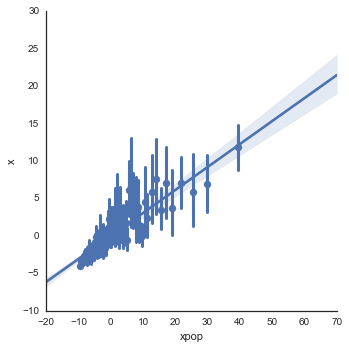

In [51]:
sns.lmplot('xpop','x', data=munpopfirms, fit_reg=True,x_bins=98)

**Here are the scatterplots again. Note that *lptot10* relates better to *x* than *xpop*. Hence we produce analogous variables for ptot10cum  **

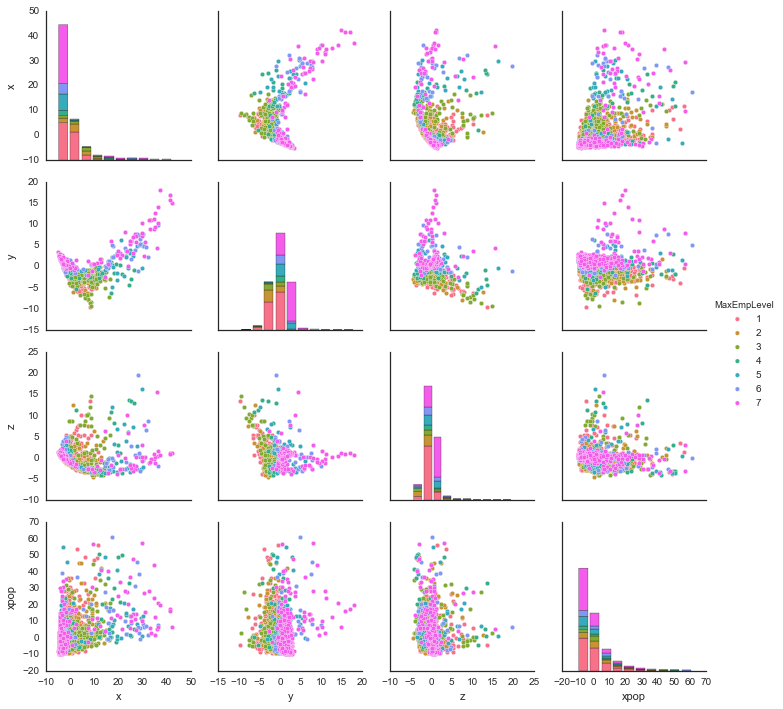

In [52]:
sns.pairplot(munpopfirms,vars=['x','y','z','xpop'],hue='MaxEmpLevel')

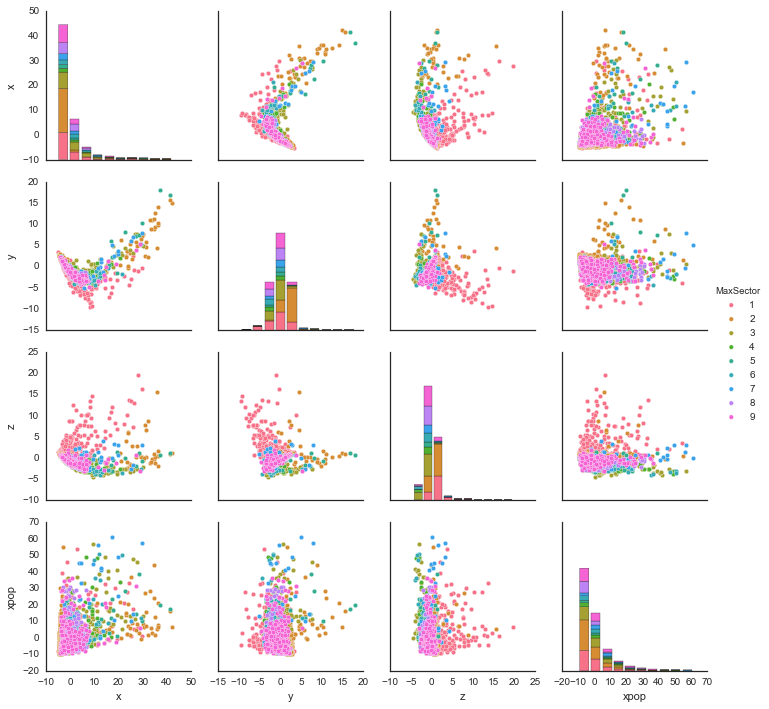

In [53]:
sns.pairplot(munpopfirms,vars=['x','y','z','xpop'],hue='MaxSector')

In [54]:
aa=pd.merge(munall,p[['entmun','ptot10cum']],on='entmun')
aa.head()

,entmun,x,y,z,MaxEmpLevel,MaxSector,x16,y16,dx,dy,im10,lptot10,ptot10cum
0,1001,31.139419,5.817599,0.237864,7,2,33.912226,11.341324,0.693202,1.380931,-1.768,13.588623,90924681
1,1002,-0.718169,-0.605252,-0.891941,1,4,-0.224036,-0.434790,0.123533,0.042615,-0.463,10.725292,25574100
2,1003,3.260364,-2.720385,-1.213549,2,2,4.261693,-2.066642,0.250332,0.163436,-0.754,10.899255,28511764
3,1004,-1.984257,0.240514,-0.407973,7,9,-1.650160,-0.088927,0.083524,-0.082360,-0.648,9.618602,7767897
4,1005,8.912515,-0.846573,-2.945456,2,3,11.153631,0.248004,0.560279,0.273644,-1.262,11.508817,41184951


**Here are the scatterplots again with *x*, *y*, *z* and *ptot10cum*.  **

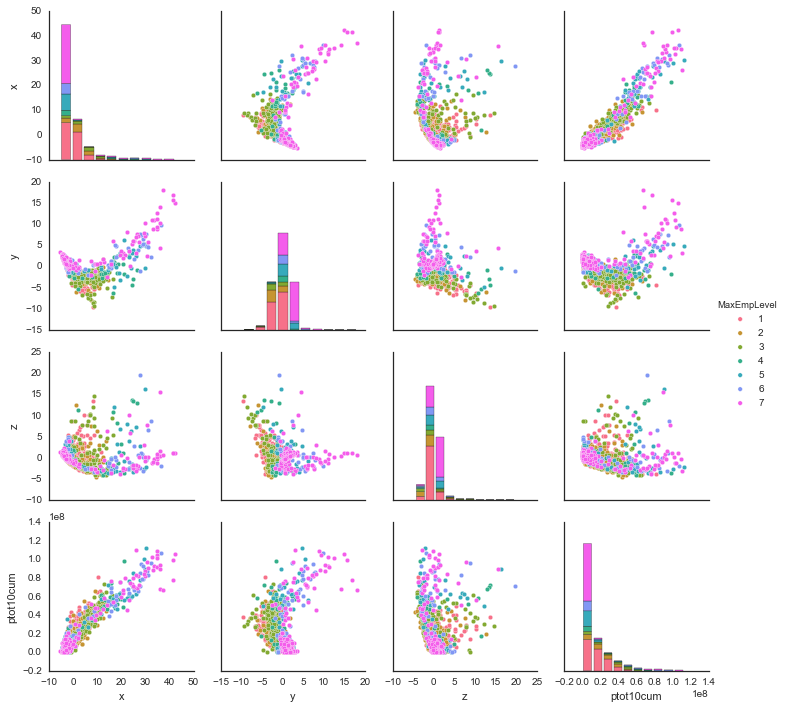

In [55]:
sns.pairplot(aa,vars=['x','y','z','ptot10cum'],hue='MaxEmpLevel')

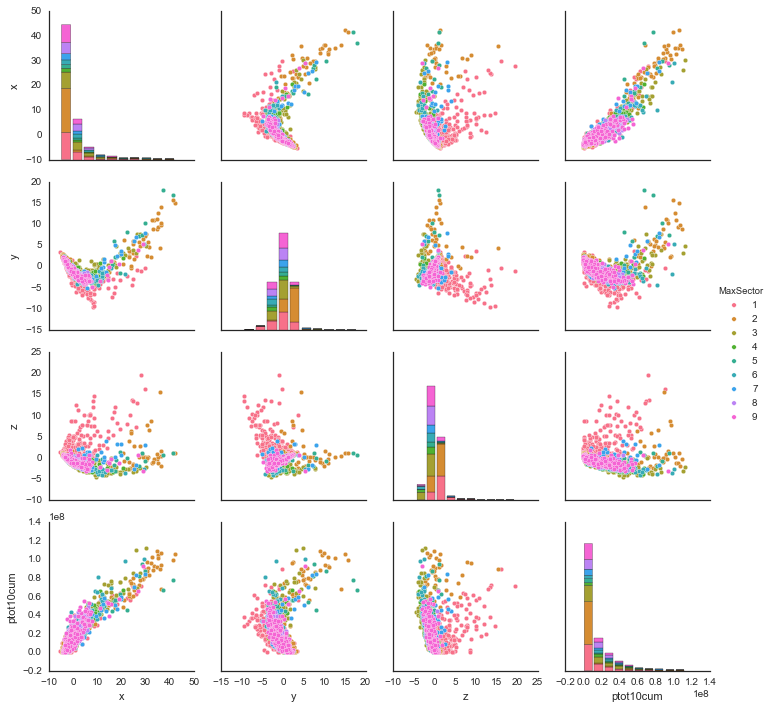

In [56]:
sns.pairplot(aa,vars=['x','y','z','ptot10cum'],hue='MaxSector')

**Population and migration data for later use**

In [57]:
p= pd.read_csv('pobmuncum1015.csv',index_col=0)
p['lptot10']=p.ptot10.apply(lambda x: np.log(x))
p['lptot15']=p.ptot15.apply(lambda x: np.log(x))
p['popgrowth10_15']=(p.lptot15-p.lptot10)/5
p['entmun']=1000*p['ent']+p['mun']
p.head()

,ent,mun,ptot10,im10,ptot15,im15,ptot10cum,ptot10cumD,dptot,ptot15cum,ptot15cumD,lptot10,lptot15,popgrowth10_15,entmun
0,1,1,797010,-1.768,877190,-1.676,90924681,22208867,0.020120,98265215,22103617,13.588623,13.684479,0.019171,1001
1,1,2,45492,-0.463,46464,-0.565,25574100,86807930,0.004273,25898514,93639592,10.725292,10.746433,0.004228,1002
2,1,3,54136,-0.754,56048,-0.698,28511764,83878910,0.007064,29150815,90396875,10.899255,10.933964,0.006942,1003
3,1,4,15042,-0.648,15577,-0.674,7767897,104583683,0.007113,7896876,111610343,9.618602,9.653551,0.006990,1004
4,1,5,99590,-1.262,120405,-1.256,41184951,71251177,0.041801,45596596,74015451,11.508817,11.698616,0.037960,1005


In [58]:
pobmig=pd.merge(p,mig,on='entmun')
pobmig.head()

,ent,mun,ptot10,im10,ptot15,im15,ptot10cum,ptot10cumD,dptot,ptot15cum,ptot15cumD,lptot10,lptot15,popgrowth10_15,entmun,nacent10,nacotrent10,pob5ymas10,vivotrent10,viveu10
0,1,1,797010,-1.768,877190,-1.676,90924681,22208867,0.020120,98265215,22103617,13.588623,13.684479,0.019171,1001,75.3,23.5,94.1,4.6,0.9
1,1,2,45492,-0.463,46464,-0.565,25574100,86807930,0.004273,25898514,93639592,10.725292,10.746433,0.004228,1002,87.5,11.4,95.9,1.7,2.0
2,1,3,54136,-0.754,56048,-0.698,28511764,83878910,0.007064,29150815,90396875,10.899255,10.933964,0.006942,1003,85.6,11.8,92.8,1.7,5.2
3,1,4,15042,-0.648,15577,-0.674,7767897,104583683,0.007113,7896876,111610343,9.618602,9.653551,0.006990,1004,89.9,9.2,95.1,2.1,2.4
4,1,5,99590,-1.262,120405,-1.256,41184951,71251177,0.041801,45596596,74015451,11.508817,11.698616,0.037960,1005,82.2,16.4,93.8,4.0,1.5


In [59]:
pobmig.describe()

,ent,mun,ptot10,im10,ptot15,im15,ptot10cum,ptot10cumD,dptot,ptot15cum,ptot15cumD,lptot10,lptot15,popgrowth10_15,entmun,nacent10,nacotrent10,pob5ymas10,vivotrent10,viveu10
count,2456.000000,2456.000000,2.456000e+03,2456.000000,2.456000e+03,2456.000000,2.456000e+03,2.456000e+03,2456.000000,2.456000e+03,2.456000e+03,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.00000,2456.000000
mean,19.258143,108.910423,4.573963e+04,-0.000005,4.865295e+04,-0.000092,1.358002e+07,9.880226e+07,0.007010,1.428125e+07,1.052590e+08,9.417450,9.447773,0.006065,19367.053746,90.387256,8.146091,95.724023,2.25623,1.283428
std,7.346150,132.571312,1.328023e+05,0.999997,1.390880e+05,1.000190,1.817026e+07,1.806264e+07,0.021721,1.940929e+07,1.929488e+07,1.554207,1.592998,0.017496,7361.717559,9.698161,9.185953,2.571052,2.37135,1.991697
min,1.000000,1.000000,9.300000e+01,-2.342000,8.700000e+01,-2.228000,9.300000e+01,1.815786e+06,-0.084055,8.700000e+01,1.827868e+06,4.532599,4.465908,-0.109040,1001.000000,29.200000,-6.000000,60.200000,-6.00000,-6.000000
25%,14.000000,23.000000,4.264500e+03,-0.760250,4.248750e+03,-0.748000,1.305613e+06,9.357359e+07,-0.001304,1.277238e+06,9.991155e+07,8.358080,8.354380,-0.001308,14083.750000,87.900000,2.500000,94.600000,1.00000,0.400000
50%,20.000000,56.000000,1.273050e+04,-0.030500,1.329100e+04,-0.074000,6.188622e+06,1.061606e+08,0.008011,6.346120e+06,1.131588e+08,9.451755,9.494842,0.007855,20230.500000,93.400000,5.200000,96.000000,1.80000,1.100000
75%,24.000000,129.000000,3.269700e+04,0.678250,3.436850e+04,0.637750,1.879564e+07,1.110352e+08,0.015289,1.961446e+07,1.182187e+08,10.395038,10.444895,0.014732,24030.250000,96.500000,10.400000,97.300000,2.90000,2.300000
max,32.000000,570.000000,1.815786e+06,4.363000,1.827868e+06,5.027000,1.123365e+08,1.123365e+08,0.636425,1.194916e+08,1.194916e+08,14.412029,14.418661,0.286164,32058.000000,100.000000,65.200000,100.000000,38.80000,11.400000


In [60]:
pobmig.to_csv('pobmig.csv')

# We extrapolate the PCA decomposition for population to 2015 

In [61]:
pobmig = pd.read_csv('pobmig.csv',index_col=0)
pobmig.head()
pop_cols=pobmig[['im10', 'lptot10', 'nacent10', 'viveu10']].as_matrix()
pop_cols_16=pobmig[['im15', 'lptot15', 'nacent10', 'viveu10']].as_matrix()
pcapop = PCA(n_components=2)
pcapop.fit(pop_cols)
PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,svd_solver='auto', tol=0.0, whiten=False)
print(pcapop.explained_variance_ratio_) 

[ 0.93415069  0.03877729]


In [62]:
poppca=pcapop.transform(pop_cols)
munpop['xpop']=poppca[:,0]
munpop['ypop']=poppca[:,1]

poppca=pcapop.transform(pop_cols_16)
munpop['xpop16']=poppca[:,0]
munpop['ypop16']=poppca[:,1]

#munpop=munpop.reset_index()
munpop=munpop[['entmun', 'im10', 'lptot10', 'nacent10', 'viveu10', 'xpop', 'ypop', 'xpop16', 'ypop16']]
pobmig.head()
munpop.head()

,entmun,im10,lptot10,nacent10,viveu10,xpop,ypop,xpop16,ypop16
0,1001,-1.768,13.588623,75.3,0.9,15.382277,-0.578804,15.383319,-0.582555
1,1002,-0.463,10.725292,87.5,2.0,3.001544,0.700208,3.008470,0.708078
2,1003,-0.754,10.899255,85.6,5.2,4.996970,3.859218,4.996105,3.856246
3,1004,-0.648,9.618602,89.9,2.4,0.560053,1.150389,0.563693,1.153256
4,1005,-1.262,11.508817,82.2,1.5,8.363043,0.125613,8.374753,0.130713


In [63]:
munpop16=munpop[['entmun',  'xpop16', 'ypop16']]
munpop16=pd.merge(munpop16,pobmig[['entmun','ptot15cum']])
munpop16.to_csv('munpop16.csv')
munpop16.head()

,entmun,xpop16,ypop16,ptot15cum
0,1001,15.383319,-0.582555,98265215
1,1002,3.008470,0.708078,25898514
2,1003,4.996105,3.856246,29150815
3,1004,0.563693,1.153256,7896876
4,1005,8.374753,0.130713,45596596


## We now calculate the firm order variables for 2016

In [64]:
munfirmsboth=pd.read_csv('munfirmsboth.csv',index_col=0)
munfirmsboth.head() 

,entmun,x,y,z,x16,y16,z16,dx,dy,dz
0,1001,31.139419,5.817599,0.237864,33.912226,11.341324,-0.172887,0.693202,1.380931,-0.102688
1,1002,-0.718169,-0.605252,-0.891941,-0.224036,-0.434790,-0.833315,0.123533,0.042615,0.014656
2,1003,3.260364,-2.720385,-1.213549,4.261693,-2.066642,-0.052882,0.250332,0.163436,0.290167
3,1004,-1.984257,0.240514,-0.407973,-1.650160,-0.088927,-0.484628,0.083524,-0.082360,-0.019164
4,1005,8.912515,-0.846573,-2.945456,11.153631,0.248004,-2.875822,0.560279,0.273644,0.017408


In [65]:
munxyz16=munfirmsboth[['x16','y16','z16']]
munxyz16=(munxyz16-munxyz16.min())/(munxyz16.max()-munxyz16.min())
a=munxyz16.x16
a=np.sort(a)
bb=munxyz16.x16.apply(lambda x: orderprop(x,3,0.05,2456))
cc=pd.DataFrame(bb)
cc.columns=['A']
ccx=cc.A.apply(pd.Series)
ccx.columns=['xm163','xm162','xm161','x160','x161','x162','x163']
a=munxyz16.y16
a=np.sort(a)
bb=munxyz16.y16.apply(lambda x: orderprop(x,3,0.05,2456))
cc=pd.DataFrame(bb)
cc.columns=['A']
ccy=cc.A.apply(pd.Series)
ccy.columns=['ym163','ym162','ym161','y160','y161','y162','y163']
a=munxyz16.z16
a=np.sort(a)
bb=munxyz16.z16.apply(lambda x: orderprop(x,3,0.05,2456))
cc=pd.DataFrame(bb)
cc.columns=['A']
ccz=cc.A.apply(pd.Series)
ccz.columns=['zm163','zm162','zm161','z160','z161','z162','z163']
munxyz16=pd.concat([munxyz16,ccx,ccy,ccz,munfirmsboth[['entmun','dx']]], axis=1)
munxyz16=munxyz16.drop('dx',axis=1)
munxyz16.to_csv('munxyz16.csv')
munxyz16.head()

,x16,y16,z16,xm163,xm162,xm161,x160,x161,x162,x163,...,y162,y163,zm163,zm162,zm161,z160,z161,z162,z163,entmun
0,0.786758,0.638106,0.171567,0.979642,0.984528,0.987785,0.991450,0.993485,0.996336,0.998371,...,0.995114,0.997557,0.001629,0.037052,0.176303,0.508143,0.929967,0.965391,0.978013,1001
1,0.101265,0.232908,0.141778,0.000000,0.000407,0.385586,0.665309,0.800896,0.863192,0.899837,...,0.947068,0.967427,0.000000,0.009772,0.072476,0.285423,0.690554,0.953176,0.973127,1002
2,0.191344,0.176759,0.176980,0.296417,0.625814,0.779316,0.849756,0.894544,0.920195,0.936075,...,0.630293,0.924674,0.003257,0.047638,0.204397,0.560668,0.942182,0.968241,0.978420,1003
3,0.072627,0.244809,0.157506,0.000000,0.000000,0.095684,0.530130,0.735342,0.829805,0.879479,...,0.961319,0.970277,0.000814,0.020358,0.116857,0.396173,0.843648,0.960505,0.975570,1004
4,0.329741,0.256402,0.049650,0.835098,0.884772,0.917752,0.932410,0.948290,0.955619,0.964169,...,0.964169,0.972313,0.000000,0.000000,0.000000,0.014658,0.089984,0.337541,0.767508,1005


## Now the population order variables for 2015

In [66]:
a=munpop16.xpop16
a=np.sort(a)
bb=munpop16.xpop16.apply(lambda x: orderprop(x,3,0.05,2456))
cc=pd.DataFrame(bb)
cc.columns=['A']
ccx=cc.A.apply(pd.Series)
ccx.columns=['xpop16m3','xpop16m2','xpop16m1','xpop160','xpop161','xpop162','xpop163']
a=munpop16.ypop16
a=np.sort(a)
bb=munpop16.ypop16.apply(lambda x: orderprop(x,3,0.05,2456))
cc=pd.DataFrame(bb)
cc.columns=['A']
ccy=cc.A.apply(pd.Series)
ccy.columns=['ypop16m3','ypop16m2','ypop16m1','ypop160','ypop161','ypop162','ypop163']
a=munpop16.ptot15cum
a=np.sort(a)
bb=munpop16.ptot15cum.apply(lambda x: orderprop(x,3,0.05,2456))
cc=pd.DataFrame(bb)
cc.columns=['A']
ccz=cc.A.apply(pd.Series)
ccz.columns=['cum16pm3','cum16pm2','cum16pm1','cum16p0','cum16p1','cum16p2','cum16p3']
munpop16plus=pd.concat([munpop16,ccx,ccy,ccz], axis=1)
munpop16plus.to_csv('munpop16plus.csv')
munpop16plus.head()

,entmun,xpop16,ypop16,ptot15cum,xpop16m3,xpop16m2,xpop16m1,xpop160,xpop161,xpop162,...,ypop161,ypop162,ypop163,cum16pm3,cum16pm2,cum16pm1,cum16p0,cum16p1,cum16p2,cum16p3
0,1001,15.383319,-0.582555,98265215,0.926710,0.927117,0.927932,0.927932,0.928339,0.928746,...,0.384365,0.403502,0.416938,0.992671,0.992671,0.992671,0.992671,0.993078,0.993078,0.993078
1,1002,3.008470,0.708078,25898514,0.758958,0.760993,0.762215,0.763029,0.765065,0.766287,...,0.710098,0.718648,0.728420,0.813518,0.813518,0.813518,0.813518,0.813925,0.813925,0.813925
2,1003,4.996105,3.856246,29150815,0.805782,0.807003,0.807410,0.809039,0.810261,0.810261,...,0.981270,0.983713,0.984528,0.839577,0.839577,0.839577,0.839577,0.839984,0.839984,0.839984
3,1004,0.563693,1.153256,7896876,0.682410,0.684039,0.685668,0.686889,0.688518,0.690147,...,0.782980,0.792345,0.796824,0.543160,0.543160,0.543160,0.543160,0.543567,0.543567,0.543567
4,1005,8.374753,0.130713,45596596,0.855863,0.857085,0.857085,0.857085,0.858713,0.859121,...,0.583062,0.592427,0.603420,0.923453,0.923453,0.923453,0.923453,0.923860,0.923860,0.923860


In [67]:
p= pd.read_csv('pobmuncum1015.csv',index_col=0)
mig= pd.read_csv('mig.csv',index_col=0)
p['entmun']=1000*p['ent']+p['mun']
munpop=pd.merge(p,mig)
munpop.to_csv('munpop.csv')
munpop.head()


,ent,mun,ptot10,im10,ptot15,im15,ptot10cum,ptot10cumD,dptot,ptot15cum,ptot15cumD,entmun,nacent10,nacotrent10,pob5ymas10,vivotrent10,viveu10
0,1,1,797010,-1.768,877190,-1.676,90924681,22208867,0.020120,98265215,22103617,1001,75.3,23.5,94.1,4.6,0.9
1,1,2,45492,-0.463,46464,-0.565,25574100,86807930,0.004273,25898514,93639592,1002,87.5,11.4,95.9,1.7,2.0
2,1,3,54136,-0.754,56048,-0.698,28511764,83878910,0.007064,29150815,90396875,1003,85.6,11.8,92.8,1.7,5.2
3,1,4,15042,-0.648,15577,-0.674,7767897,104583683,0.007113,7896876,111610343,1004,89.9,9.2,95.1,2.1,2.4
4,1,5,99590,-1.262,120405,-1.256,41184951,71251177,0.041801,45596596,74015451,1005,82.2,16.4,93.8,4.0,1.5


In [98]:
#import brewer2mpl
#bmap = brewer2mpl.get_map('Accent', 'Qualitative', 7)

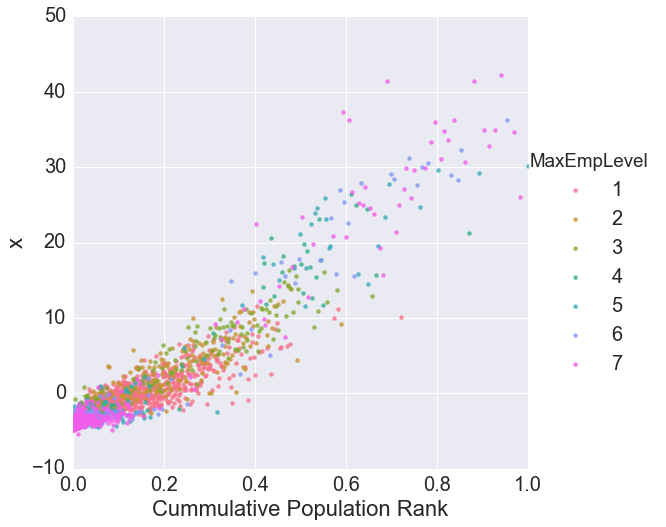

In [106]:
aa=pd.merge(munall,munpopxyplus)
aa=aa[['entmun','x','ptot10cum','MaxEmpLevel','MaxSector']]

aa['row']=1
aa['col']=1

#aa.head()

#sns.choose_colorbrewer_palette(['diverging'])

sns.set(font_scale=2)

fig=sns.lmplot(x="ptot10cum", y="x", hue="MaxEmpLevel", data=aa,row='row',col='col',fit_reg=False,size=8) 
#fig.ax.figzise=(25,20)
#ax = plt.subplots(figsize=(15,10))
sns.plt.xlim(0,1.0)
#sns.plt.suptitle('')
fig.facet_axis(0,0).set_title('')
fig.facet_axis(0,0).set_xlabel('Cummulative Population Rank')
fig.facet_axis(0,0).set_ylabel('x')


sns.set(style="whitegrid")
#sns.plt.ylim(0,50)


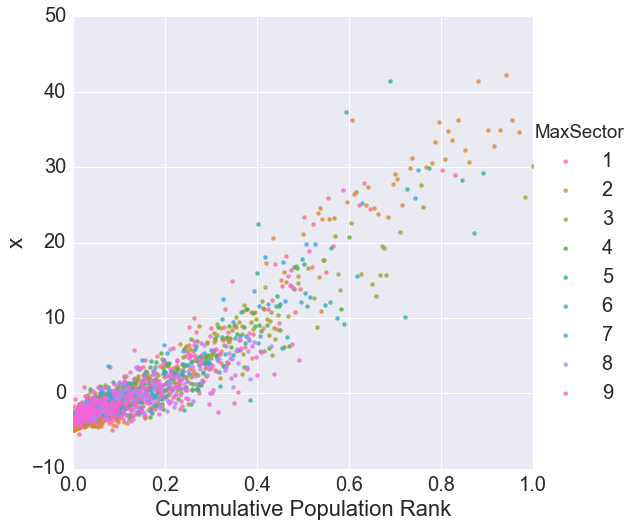

In [107]:

aa=pd.merge(munall,munpopxyplus)
aa=aa[['entmun','x','ptot10cum','MaxEmpLevel','MaxSector']]

aa['row']=1
aa['col']=1

#aa.head()


sns.set(font_scale=2)

fig=sns.lmplot(x="ptot10cum", y="x", hue="MaxSector", data=aa,row='row',col='col',fit_reg=False,size=8) 
#fig.ax.figzise=(25,20)
#ax = plt.subplots(figsize=(15,10))
sns.plt.xlim(0,1.0)
#sns.plt.suptitle('')
fig.facet_axis(0,0).set_title('')
fig.facet_axis(0,0).set_xlabel('Cummulative Population Rank')
fig.facet_axis(0,0).set_ylabel('x')


sns.set(style="whitegrid")
#sns.plt.ylim(0,50)
